In [1]:
import json
from matplotlib import pyplot as plt

from dispatcher import Decoder

In [2]:
with open('state.json') as f:
    j = f.read()
    state = json.loads(j, cls=Decoder)
    

In [3]:
results = state['results']

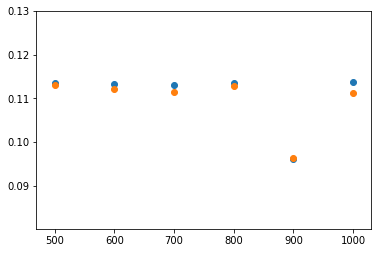

In [5]:
epoch = -1

ds = []
test_accs = []
train_accs = []
for result in results:
    ds.append(result['d'])
    train_accs.append(result['train_acc_history'][epoch])
    test_accs.append(result['test_acc_history'][epoch])

plt.scatter(ds, test_accs)
plt.scatter(ds, train_accs)
plt.show()